# IBM Applied Data Science Capstone Course by Coursera
#### _by Kunal Tale_
### Week 5 Final Project
_Opening of a Pizza Place near Mumbai's Tourist Places_  
- Build a dataframe of Tourist Places in Mumbai, India by web scraping the data from Wikipedia page
- Get the geographical coordinates of the Tourist Places
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods of the Tourist Places
- Select the best cluster to open Pizza Place

#### 1. Import Libraries

In [15]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import matplotlib.pyplot as plt
import seaborn as sns

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge geocoder --yes
import geocoder # to get coordinates

#!conda install -c conda-forge bs4 --yes
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


#### 2. Get Dataset

In [16]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Mumbai").text
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html5lib')

In [17]:
# create a list to store neighborhood data
TouristPlaceList = []
# append the data into the list
#for row in soup.find_all("div",class_="toc")[0].findAll("li"):
#    TouristPlaceList.append(row.text)
#for row in soup.find_all("ul")[2].findAll("li"):
#    TouristPlaceList.append(row.text)
#TouristPlaceList 2-14
for i in range(2,14):
    for row in soup.find_all("ul")[i].findAll("li"):
        TouristPlaceList.append(row.text)
TouristPlaceList = pd.DataFrame({"TouristPlace": TouristPlaceList})
TouristPlaceList.head()

,TouristPlace
0,Adlabs Imagica
1,Andheri Sports Complex
2,B.P.T. Ground
3,Bandra Kurla Complex Ground
4,Brabourne Stadium


In [18]:
TouristPlaceList.shape

(162, 1)

#### 3.Get Geo Coordinates

In [19]:
def get_latlng(TouristPlace):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(TouristPlace))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [20]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(TouristPlace) for TouristPlace in TouristPlaceList["TouristPlace"].tolist() ]

In [21]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [22]:
# merge the coordinates into the original dataframe
TouristPlaceList['Latitude'] = df_coords['Latitude']
TouristPlaceList['Longitude'] = df_coords['Longitude']
# check the neighborhoods and the coordinates
print(TouristPlaceList.shape)
TouristPlaceList

(162, 3)


,TouristPlace,Latitude,Longitude
0,Adlabs Imagica,18.768290,73.282610
1,Andheri Sports Complex,19.128920,72.836290
2,B.P.T. Ground,19.017470,72.819200
3,Bandra Kurla Complex Ground,19.066840,72.861930
4,Brabourne Stadium,18.932580,72.823470
5,Colaba Woods,18.911520,72.819120
6,Cooperage Ground,18.924440,72.829580
7,Cross Maidan,18.939900,72.829850
8,Dadaji Kondadev Stadium,19.193170,72.980030
9,DY Patil Stadium,19.041350,73.027080


In [23]:
# save the DataFrame as CSV file
TouristPlaceList.to_csv("TouristPlaceList.csv", index=False)

#### 4. Create Map of Mumbai

In [24]:
# get the coordinates of Kuala Lumpur
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai, India 18.9387711, 72.8353355.


In [25]:
# create map of Toronto using latitude and longitude values
map_mi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, TouristPlace in zip(TouristPlaceList['Latitude'], TouristPlaceList['Longitude'], TouristPlaceList['TouristPlace']):
    label = '{}'.format(TouristPlace)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mi)  
    
map_mi

In [26]:
# save the map as HTML file
map_mi.save('map_mi_1.html')

#### 5. Foursquare API to explore the neighborhoods of the Tourist places

Foursquare client ID

In [27]:

CLIENT_ID = 'IQWXXT1WH2U52DVWG13LSQX22K344UH5HKDSVBJGRTI3YCCO' # your Foursquare ID
CLIENT_SECRET = 'GOKQJXYUPICIKIXGNVQYYA1W2DSLFCHGZKRQX105IVHIBDSX' # your Foursquare Secret
VERSION = '20200315' # Foursquare API version


In [28]:
radius = 3000
LIMIT = 100

venues = []

for lat, long, TouristPlace in zip(TouristPlaceList['Latitude'], TouristPlaceList['Longitude'], TouristPlaceList['TouristPlace']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            TouristPlace,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [29]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['TouristPlace', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(13995, 7)


,TouristPlace,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Adlabs Imagica,18.76829,73.28261,Adlabs Imagica,18.767977,73.282027,Theme Park
1,Adlabs Imagica,18.76829,73.28261,Nitro,18.768260,73.281791,Theme Park Ride / Attraction
2,Adlabs Imagica,18.76829,73.28261,Adlabs Aquamagica,18.768281,73.282171,Water Park
3,Adlabs Imagica,18.76829,73.28261,Scream Machine,18.768881,73.281135,Theme Park Ride / Attraction
4,Adlabs Imagica,18.76829,73.28261,Mr. India,18.766420,73.280438,Indie Movie Theater


In [30]:
venues_df.groupby(["TouristPlace"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
TouristPlace,,,,,,
Capitol Cinema,8,8,8,8,8,8
National Gallery of Modern Art,100,100,100,100,100,100
Adlabs Imagica,14,14,14,14,14,14
Afghan Church,35,35,35,35,35,35
Aksa Beach,16,16,16,16,16,16
Andheri Sports Complex,100,100,100,100,100,100
Annapurna Studios,100,100,100,100,100,100
Antarang – Sex Health Information Art Gallery,100,100,100,100,100,100
B.P.T. Ground,56,56,56,56,56,56


Let's find out how many unique categories can be curated from all the returned venues

In [31]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 218 uniques categories.


In [32]:
# print out the list of categories
venues_df['VenueCategory'].unique()

array(['Theme Park', 'Theme Park Ride / Attraction', 'Water Park',
       'Indie Movie Theater', 'Indian Restaurant', 'American Restaurant',
       'Resort', 'Fast Food Restaurant', 'Breakfast Spot', 'Snack Place',
       'Pizza Place', 'Brewery', 'Multiplex', 'Falafel Restaurant',
       'Mediterranean Restaurant', 'Pub', 'Bakery', 'Café', 'Diner',
       'Mughlai Restaurant', 'Juice Bar', 'BBQ Joint', 'Lounge',
       "Women's Store", 'Ice Cream Shop', 'Coffee Shop', 'Bar',
       'Comfort Food Restaurant', 'Chinese Restaurant', 'Movie Theater',
       'Spa', 'Residential Building (Apartment / Condo)',
       'South Indian Restaurant', 'Jewelry Store', 'Gym',
       'Bengali Restaurant', 'Sandwich Place',
       'Vegetarian / Vegan Restaurant', 'Donut Shop', 'Dessert Shop',
       'Beach', 'Theater', 'Cupcake Shop', 'Italian Restaurant',
       'Cocktail Bar', 'Seafood Restaurant', 'Mexican Restaurant',
       'Hotel', 'French Restaurant', 'Scenic Lookout',
       'Athletics & Sports

In [33]:
# check if the results contain "Pizza Place"
"Pizza Place" in venues_df['VenueCategory'].unique()

True

In [34]:
VenueCategory_df=pd.DataFrame(venues_df['VenueCategory'].unique())
# save the DataFrame as CSV file
VenueCategory_df.to_csv("VenueCategory.csv", index=False)

#### 6. Analyze Each Tourist Place

In [35]:
# one hot encoding
TouristPlaceList_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TouristPlaceList_onehot['TouristPlace'] = venues_df['TouristPlace'] 

# move neighborhood column to the first column
fixed_columns = [TouristPlaceList_onehot.columns[-1]] + list(TouristPlaceList_onehot.columns[:-1])
TouristPlaceList_onehot = TouristPlaceList_onehot[fixed_columns]

print(TouristPlaceList_onehot.shape)
TouristPlaceList_onehot.head()

(13995, 219)


,TouristPlace,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Burrito Place,Bus Station,Café,Campground,Caribbean Restaurant,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Punjabi Restaurant,Racetrack,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toll Plaza,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Adlabs Imagica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adlabs Imagica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adlabs Imagica

In [36]:
TouristPlaceList_grouped = TouristPlaceList_onehot.groupby(["TouristPlace"]).mean().reset_index()

print(TouristPlaceList_grouped.shape)
TouristPlaceList_grouped

(161, 219)


,TouristPlace,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Burrito Place,Bus Station,Café,Campground,Caribbean Restaurant,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Punjabi Restaurant,Racetrack,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toll Plaza,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Capitol Cinema,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.125000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [37]:
len(TouristPlaceList_grouped[TouristPlaceList_grouped["Pizza Place"] > 0])

134

In [38]:
TouristPlaceList_PizzPlace = TouristPlaceList_grouped[["TouristPlace","Pizza Place"]]
TouristPlaceList_PizzPlace.head()

,TouristPlace,Pizza Place
0,Capitol Cinema,0.000000
1,National Gallery of Modern Art,0.020000
2,Adlabs Imagica,0.071429
3,Afghan Church,0.028571
4,Aksa Beach,0.000000


#### 7. Cluster Tourist Place

In [39]:
columns_dont_want = ["TouristPlace"]
select = [x for x in TouristPlaceList_grouped.columns if x not in columns_dont_want]
X=TouristPlaceList_grouped.loc[:, select]

In [40]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [41]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

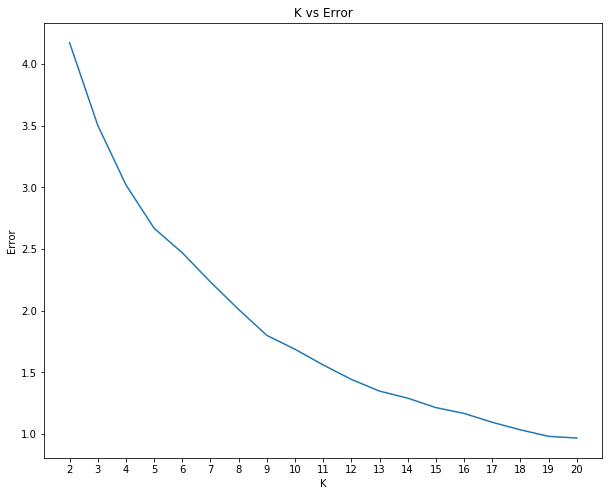

In [42]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

It is evident from the above plot that we have atleat 9 clusters in our data.

In [43]:
# set number of clusters
kclusters = 9

TouristPlaceList_clustering = TouristPlaceList_PizzPlace.drop(["TouristPlace"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TouristPlaceList_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 4, 1, 3, 5, 3, 5, 0, 4, 4], dtype=int32)

In [44]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
TouristPlaceList_merged = TouristPlaceList_PizzPlace.copy()

# add clustering labels
TouristPlaceList_merged["Cluster Labels"] = kmeans.labels_

In [45]:
TouristPlaceList_merged.head()

,TouristPlace,Pizza Place,Cluster Labels
0,Capitol Cinema,0.000000,5
1,National Gallery of Modern Art,0.020000,4
2,Adlabs Imagica,0.071429,1
3,Afghan Church,0.028571,3
4,Aksa Beach,0.000000,5


In [46]:
# merge TouristPlaceList with TouristPlaceList_merge to add latitude/longitude for each neighborhood
TouristPlaceList_merged = TouristPlaceList_merged.join(TouristPlaceList.set_index("TouristPlace"), on="TouristPlace")

print(TouristPlaceList_merged.shape)
TouristPlaceList_merged.head() # check the last columns!

(162, 5)


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude
0,Capitol Cinema,0.000000,5,29.39041,79.45498
1,National Gallery of Modern Art,0.020000,4,18.94143,72.83232
2,Adlabs Imagica,0.071429,1,18.76829,73.28261
3,Afghan Church,0.028571,3,18.90654,72.81660
4,Aksa Beach,0.000000,5,19.17321,72.79674


Now let's create the new dataframe and display the top 10 venues for each Tourist Place.

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['TouristPlace']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
TouristPlaceList_venues_sorted = pd.DataFrame(columns=columns)
TouristPlaceList_venues_sorted['TouristPlace'] = TouristPlaceList_grouped['TouristPlace']

for ind in np.arange(TouristPlaceList_grouped.shape[0]):
    row_categories = TouristPlaceList_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    TouristPlaceList_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(TouristPlaceList_venues_sorted.shape)
TouristPlaceList_venues_sorted.head()

(161, 11)


,TouristPlace,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capitol Cinema,Bakery,Indian Restaurant,Café,Road,Lake,City,Coffee Shop,Flea Market,Department Store,Deli / Bodega
1,National Gallery of Modern Art,Indian Restaurant,Ice Cream Shop,Café,Hotel,Fast Food Restaurant,Bar,Coffee Shop,Cricket Ground,Chinese Restaurant,Bakery
2,Adlabs Imagica,Theme Park Ride / Attraction,Fast Food Restaurant,Pizza Place,Snack Place,Resort,Indie Movie Theater,Indian Restaurant,Theme Park,Breakfast Spot,American Restaurant
3,Afghan Church,Hotel,Diner,Café,Dessert Shop,Scenic Lookout,Seafood Restaurant,Flea Market,Pub,Boutique,Bar
4,Aksa Beach,Beach,Boat or Ferry,Resort,Hotel,Pier,Harbor / Marina,Bakery,Hotel Pool,Donut Shop,Dumpling Restaurant


In [48]:
# merge TouristPlaceList with TouristPlaceList_merge to add latitude/longitude for each neighborhood
TouristPlaceList_merged = TouristPlaceList_merged.join(TouristPlaceList_venues_sorted.set_index("TouristPlace"), on="TouristPlace")

print(TouristPlaceList_merged.shape)


(162, 15)


In [49]:
TouristPlaceList_merged.reset_index(inplace = False) 
TouristPlaceList_merged.head()

,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capitol Cinema,0.000000,5,29.39041,79.45498,Bakery,Indian Restaurant,Café,Road,Lake,City,Coffee Shop,Flea Market,Department Store,Deli / Bodega
1,National Gallery of Modern Art,0.020000,4,18.94143,72.83232,Indian Restaurant,Ice Cream Shop,Café,Hotel,Fast Food Restaurant,Bar,Coffee Shop,Cricket Ground,Chinese Restaurant,Bakery
2,Adlabs Imagica,0.071429,1,18.76829,73.28261,Theme Park Ride / Attraction,Fast Food Restaurant,Pizza Place,Snack Place,Resort,Indie Movie Theater,Indian Restaurant,Theme Park,Breakfast Spot,American Restaurant
3,Afghan Church,0.028571,3,18.90654,72.81660,Hotel,Diner,Café,Dessert Shop,Scenic Lookout,Seafood Restaurant,Flea Market,Pub,Boutique,Bar
4,Aksa Beach,0.000000,5,19.17321,72.79674,Beach,Boat or Ferry,Resort,Hotel,Pier,Harbor / Marina,Bakery,Hotel Pool,Donut Shop,Dumpling Restaurant


#### Finally, let's visualize the resulting clusters

In [50]:
# get the coordinates of Kuala Lumpur
address = 'Bandra, Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TouristPlaceList_merged['Latitude'], TouristPlaceList_merged['Longitude'], TouristPlaceList_merged['TouristPlace'], TouristPlaceList_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

#### 8. Examine Clusters

Cluster 1

In [52]:
C1=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 0]
print(C1['TouristPlace'].count())
C1.reset_index(drop=True, inplace=True)
C1

21


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antarang – Sex Health Information Art Gallery,0.010000,0,19.031150,72.843850,Indian Restaurant,Café,Chinese Restaurant,Snack Place,Ice Cream Shop,Beach,Dessert Shop,Fast Food Restaurant,Coffee Shop,Tea Room
1,Bandra Talao,0.010000,0,19.055510,72.837600,Indian Restaurant,Chinese Restaurant,Café,Coffee Shop,Bakery,Seafood Restaurant,Lounge,Ice Cream Shop,Dessert Shop,Scenic Lookout
2,Chor Bazaar,0.010000,0,18.959950,72.829600,Indian Restaurant,Ice Cream Shop,Bar,Restaurant,Chinese Restaurant,Dessert Shop,Fast Food Restaurant,Seafood Restaurant,Bakery,Juice Bar
3,"Church of Our Lady of Health, Cavel",0.010000,0,18.949000,72.827770,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Restaurant,Bakery,Juice Bar,Cricket Ground,Hotel,Dessert Shop
4,Gloria Church,0.010000,0,18.975570,72.834360,Indian Restaurant,Restaurant,Café,Bakery,Ice Cream Shop,Bar,Dessert Shop,Hotel,Fast Food Restaurant,BBQ Joint
5,Grand Hyatt Mumbai,0.010000,0,19.076710,72.850820,Indian Restaurant,Café,Hotel,Lounge,Bar,Seafood Restaurant,Coffee Shop,Dessert Shop,Italian Restaurant,Bakery
6,Inorbit Mall,0.010000,0,19.172860,72.836100,Indian Restaurant,Coffee Shop,Multiplex,Clothing Store,Donut Shop,Café,Bar,Fast Food Restaurant,Lounge,Italian Restaurant
7,Jivdani Mata,0.010000,0,19.015200,72.844850,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Movie Theater,Fast Food Restaurant,Coffee Shop,Lounge,Dessert Shop,Italian Restaurant
8,Kohinoor Square,0.010000,0,19.024680,72.840820,Indian Restaurant,Chinese Restaurant,Café,Ice Cream Shop,Coffee Shop,Fast Food Restaurant,Movie Theater,Dessert Shop,South Indian Restaurant,Snack Place
9,Linking Road,0.010000,0,19.074040,72.834480,Indian Restaurant,Café,Bakery,Dessert Shop,Ice Cream Shop,Seafood Restaurant,Lounge,Cupcake Shop,Bar,Scenic Lookout


1st most common place in Cluster 1 is Indian Restaurant

In [53]:
count=0
if ('Pizza Place' in C1.iloc[:,5:].values):
    for x in range(5,14):
        count=C1.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

0

In cluster 1, Pizza Place is not present in top 10 venue list

Cluster 2

In [54]:
C2=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 1]
print(C2['TouristPlace'].count())
C2.reset_index(drop=True, inplace=True)
C2

5


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlabs Imagica,0.071429,1,18.76829,73.28261,Theme Park Ride / Attraction,Fast Food Restaurant,Pizza Place,Snack Place,Resort,Indie Movie Theater,Indian Restaurant,Theme Park,Breakfast Spot,American Restaurant
1,Dadaji Kondadev Stadium,0.060000,1,19.19317,72.98003,Indian Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Ice Cream Shop,Multiplex,Chinese Restaurant,Seafood Restaurant,Hotel,Italian Restaurant
2,Growel's 101,0.060000,1,19.20224,72.86145,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Café,Pizza Place,Ice Cream Shop,Lounge,Restaurant,Snack Place,Department Store
3,R. K. Studio,0.058140,1,19.04679,72.90721,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Chinese Restaurant,Lounge,Asian Restaurant,Ice Cream Shop,Coffee Shop,Bar
4,"Raghuleela Mall, Kandivili",0.060000,1,19.21289,72.84931,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Restaurant,Coffee Shop,Chinese Restaurant,Lounge,Café,Food Truck


Cluster 2 has Fast Food Restaurants as 2nd Most Common Venue

In [55]:
count=0
if ('Pizza Place' in C2.iloc[:,5:].values):
    for x in range(5,14):
        count=C2.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

5

Pizza Place is present as one of the 10 Most Common Places near the Tourist Place

Cluster 3

In [56]:
C3=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 2]
print(C3['TouristPlace'].count())
C3.reset_index(drop=True, inplace=True)
C3

1


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Watson's Hotel,0.25,2,29.93151,73.87259,Pizza Place,Food Court,Train Station,Clothing Store,Dim Sum Restaurant,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


In [57]:
count=0
if ('Pizza Place' in C3.iloc[:,5:].values):
    for x in range(5,14):
        count=C3.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

1

Pizza Place is present as the 1st most Common venue near the Tourist Place

Cluster 4

In [58]:
C4=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 3]
print(C4['TouristPlace'].count())
C4.reset_index(drop=True, inplace=True)
C4

28


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Afghan Church,0.028571,3,18.906540,72.816600,Hotel,Diner,Café,Dessert Shop,Scenic Lookout,Seafood Restaurant,Flea Market,Pub,Boutique,Bar
1,Andheri Sports Complex,0.030000,3,19.128920,72.836290,Indian Restaurant,Pub,Chinese Restaurant,Ice Cream Shop,Café,Italian Restaurant,Bar,Pizza Place,Juice Bar,Diner
2,Brabourne Stadium,0.030000,3,18.932580,72.823470,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Hotel,Bakery,Juice Bar,Chinese Restaurant,Pizza Place,Coffee Shop
3,Cafe Mondegar,0.025641,3,18.924180,72.832080,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Fast Food Restaurant,Harbor / Marina,Dessert Shop,Coffee Shop,Pizza Place
4,Cathedral of the Holy Name,0.025974,3,18.923480,72.830210,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Fast Food Restaurant,Harbor / Marina,Dessert Shop,Coffee Shop,Pizza Place
5,"Church of Our Lady of Dolours, Wadala",0.030000,3,19.019090,72.856090,Indian Restaurant,Chinese Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Snack Place,Movie Theater,Dessert Shop,Pizza Place,Bar
6,Church of Our Lady of Good Counsel & Shrine of...,0.030000,3,19.045890,72.863620,Indian Restaurant,Bar,Café,Chinese Restaurant,Dessert Shop,Pizza Place,Ice Cream Shop,Juice Bar,Coffee Shop,Snack Place
7,Colaba Causeway,0.025316,3,18.924493,72.832157,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Fast Food Restaurant,Harbor / Marina,Dessert Shop,Coffee Shop,Pizza Place
8,DY Patil Stadium,0.031250,3,19.041350,73.027080,Indian Restaurant,Fast Food Restaurant,Bakery,Café,Train Station,BBQ Joint,Lake,Scenic Lookout,Shopping Mall,Diner
9,Eros Cinema,0.030000,3,18.932370,72.827830,Indian Restaurant,Café,Hotel,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Dessert Shop,Bakery,Cricket Ground


In [59]:
count=0
if ('Pizza Place' in C4.iloc[:,5:].values):
    for x in range(5,14):
        count=C4.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

12

Pizza Place is present as one of the top 10 common venues near 12 of the 28 Tourist places in cluster 4

Cluster 5

In [60]:
C5=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 4]
print(C5['TouristPlace'].count())
C5.reset_index(drop=True, inplace=True)
C5

63


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,National Gallery of Modern Art,0.020000,4,18.941430,72.832320,Indian Restaurant,Ice Cream Shop,Café,Hotel,Fast Food Restaurant,Bar,Coffee Shop,Cricket Ground,Chinese Restaurant,Bakery
1,B.P.T. Ground,0.017857,4,19.017470,72.819200,Indian Restaurant,Hotel,Italian Restaurant,Restaurant,Lounge,Scenic Lookout,Beach,Shopping Mall,Hotel Bar,Ice Cream Shop
2,Babulnath,0.020000,4,18.956650,72.808630,Indian Restaurant,Ice Cream Shop,Restaurant,Fast Food Restaurant,Dessert Shop,Bakery,Juice Bar,Park,Snack Place,Gastropub
3,Bassein Fort,0.020000,4,18.932250,72.832870,Indian Restaurant,Hotel,Café,Bar,Ice Cream Shop,Mediterranean Restaurant,Cricket Ground,Coffee Shop,Restaurant,Chinese Restaurant
4,Belapur Fort,0.020000,4,18.932250,72.832870,Indian Restaurant,Hotel,Café,Bar,Ice Cream Shop,Mediterranean Restaurant,Cricket Ground,Coffee Shop,Restaurant,Chinese Restaurant
5,Bombay Castle,0.020000,4,18.931080,72.838700,Indian Restaurant,Café,Hotel,Bar,Ice Cream Shop,Asian Restaurant,Cricket Ground,Coffee Shop,Chinese Restaurant,Lounge
6,Chhatrapati Shivaji Maharaj Vastu Sangrahalaya,0.022989,4,18.926490,72.831510,Indian Restaurant,Café,Hotel,Bakery,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,Coffee Shop,Pizza Place,Diner
7,"Church of Our Lady of Mount Carmel, Bandra",0.020000,4,19.046550,72.822260,Indian Restaurant,Bakery,Café,Lounge,Dessert Shop,Italian Restaurant,Scenic Lookout,Ice Cream Shop,Seafood Restaurant,Deli / Bodega
8,Colaba Woods,0.020000,4,18.911520,72.819120,Indian Restaurant,Café,Hotel,Bar,Asian Restaurant,Coffee Shop,Japanese Restaurant,Mediterranean Restaurant,Italian Restaurant,Dessert Shop
9,Cooperage Ground,0.024096,4,18.924440,72.829580,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Cricket Ground,Pizza Place,Fast Food Restaurant,Italian Restaurant,Restaurant


In [61]:
count=0
if ('Pizza Place' in C5.iloc[:,5:].values):
    for x in range(5,14):
        count=C5.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

2

Pizza Place is present as one of the top 10 venue places in only 2 of the 63 tourist place in cluster 5

Cluster 6

In [62]:
C6=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 5]
print(C6['TouristPlace'].count())
C6.reset_index(drop=True, inplace=True)
C6

27


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capitol Cinema,0.0,5,29.390410,79.454980,Bakery,Indian Restaurant,Café,Road,Lake,City,Coffee Shop,Flea Market,Department Store,Deli / Bodega
1,Aksa Beach,0.0,5,19.173210,72.796740,Beach,Boat or Ferry,Resort,Hotel,Pier,Harbor / Marina,Bakery,Hotel Pool,Donut Shop,Dumpling Restaurant
2,Annapurna Studios,0.0,5,19.104661,72.853322,Indian Restaurant,Hotel,Lounge,Coffee Shop,Seafood Restaurant,Café,Ice Cream Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant
3,Bombay Talkies,0.0,5,18.961810,72.820280,Indian Restaurant,Dessert Shop,Bakery,Coffee Shop,Restaurant,Café,Bar,Fast Food Restaurant,Ice Cream Shop,Chinese Restaurant
4,Castella de Aguada,0.0,5,15.516670,73.766670,Restaurant,Seafood Restaurant,Hotel,Café,Resort,Indian Restaurant,Asian Restaurant,Italian Restaurant,Beach,Lounge
5,Dadasaheb Phalke Chitranagari,0.0,5,19.159540,72.884730,Hotel,Indian Restaurant,Gym,Farm,Café,Restaurant,Gym / Fitness Center,Event Space,Seafood Restaurant,Fast Food Restaurant
6,Dongri Fort,0.0,5,18.960210,72.837720,Indian Restaurant,Café,Coffee Shop,History Museum,Chinese Restaurant,Cricket Ground,Ice Cream Shop,Bar,Restaurant,Hotel
7,Elephanta Caves,0.0,5,18.963270,72.932130,Cave,Historic Site,Harbor / Marina,Boat or Ferry,Zoo,Donut Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
8,Irani café,0.0,5,18.961020,72.837030,Indian Restaurant,Café,Coffee Shop,History Museum,Bar,Ice Cream Shop,Juice Bar,Irani Cafe,Cricket Ground,Train Station
9,Jogger's Park,0.0,5,19.112850,72.896620,Indian Restaurant,Hotel,Italian Restaurant,Lounge,Pub,Restaurant,Coffee Shop,Chinese Restaurant,Café,Seafood Restaurant


In [63]:
count=0
if ('Pizza Place' in C6.iloc[:,5:].values):
    for x in range(5,14):
        count=C6.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

0

Pizza place is not present as one of the top 10 common venue in cluster 6 tourist places

cluster 7

In [64]:
C7=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 6]
print(C7['TouristPlace'].count())
C7.reset_index(drop=True, inplace=True)
C7

2


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Metro Junction Mall,0.100000,6,19.22958,73.12400,Fast Food Restaurant,Pizza Place,Café,Electronics Store,Indian Restaurant,Hookah Bar,Thai Restaurant,Shopping Mall,Bus Station,Lounge
1,"Our Lady of Immaculate Conception Church, Mt. ...",0.090909,6,19.23443,72.78212,Resort,Beach,Hotel,Theme Park,Indian Restaurant,Pizza Place,Water Park,Falafel Restaurant,Dim Sum Restaurant,Electronics Store


In [65]:
count=0
if ('Pizza Place' in C7.iloc[:,5:].values):
    for x in range(5,14):
        count=C7.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

2

Pizza Place is present as one of the top 10 most common venues in all of the cluster 7 tourist places

Cluster 8

In [66]:
C8=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 7]
print(C8['TouristPlace'].count())
C8.reset_index(drop=True, inplace=True)
C8

12


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crossroads Mall,0.037037,7,30.332510,78.053920,Fast Food Restaurant,Café,Flea Market,Train Station,Coffee Shop,Indian Restaurant,Thai Restaurant,Shopping Mall,Burger Joint,Food Court
1,EsselWorld,0.037037,7,19.231350,72.805180,Indian Restaurant,Café,Water Park,Restaurant,Playground,Theme Park,Gym,Bus Station,Bridge,Fast Food Restaurant
2,Kanheri Caves,0.040000,7,19.231500,72.863750,Indian Restaurant,Café,Ice Cream Shop,Chinese Restaurant,Gym,Fast Food Restaurant,Restaurant,Pizza Place,Lounge,Sandwich Place
3,Mahakali Caves,0.044776,7,19.130300,72.872980,Indian Restaurant,Hotel,Restaurant,Coffee Shop,Pizza Place,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Garden
4,Middle Income Group Club Ground,0.040000,7,19.060872,72.896277,Indian Restaurant,Bar,Coffee Shop,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Vegetarian / Vegan Restaurant,Café,Restaurant,Ice Cream Shop
5,Neptune Magnet Mall,0.042254,7,19.141470,72.931920,Indian Restaurant,Café,Fast Food Restaurant,Coffee Shop,Train Station,Pizza Place,Pub,Shopping Mall,Asian Restaurant,Clothing Store
6,Our Lady of Egypt Church,0.040000,7,19.078120,72.869030,Indian Restaurant,Hotel,Coffee Shop,Lounge,Italian Restaurant,Bar,Pizza Place,Café,Chinese Restaurant,Restaurant
7,Ramdev Film Ciity,0.040000,7,19.139240,72.833570,Indian Restaurant,Café,Chinese Restaurant,Multiplex,Pizza Place,Fast Food Restaurant,Gym / Fitness Center,Coffee Shop,Bakery,Ice Cream Shop
8,Royal Opera House,0.040000,7,18.956250,72.815760,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Restaurant,Bakery,Pizza Place,Dessert Shop,Juice Bar,Cricket Ground,Gastropub
9,Shaneshwar Sansthan,0.040000,7,19.053600,72.885380,Indian Restaurant,Bar,Lounge,Chinese Restaurant,Café,Pizza Place,Fast Food Restaurant,Dessert Shop,Snack Place,Italian Restaurant


In [67]:
count=0
if ('Pizza Place' in C8.iloc[:,5:].values):
    for x in range(5,14):
        count=C8.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

9

Pizza Place is present as one of the top 10 most common place in 9 of the 12 tourist places in cluster 8

Cluster 9

In [68]:
C9=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 8]
print(C9['TouristPlace'].count())
C9.reset_index(drop=True, inplace=True)
C9

3


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandra Kurla Complex Ground,0.050000,8,19.066840,72.86193,Indian Restaurant,Bar,Hotel,Pizza Place,Café,Coffee Shop,Dessert Shop,Lounge,Ice Cream Shop,Seafood Restaurant
1,Jijamata Udyaan,0.050000,8,19.120991,72.85619,Indian Restaurant,Hotel,Ice Cream Shop,Chinese Restaurant,Pizza Place,Italian Restaurant,Asian Restaurant,Seafood Restaurant,Restaurant,Café
2,Sanjay Gandhi National Park,0.054054,8,19.166710,72.92988,Fast Food Restaurant,Indian Restaurant,Café,Ice Cream Shop,Pizza Place,Snack Place,Multiplex,Clothing Store,Mountain,Gym


In [69]:
count=0
if ('Pizza Place' in C9.iloc[:,5:].values):
    for x in range(5,14):
        count=C9.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

3

Pizza Place is present as one of the top 10 most common places in all the 3 tourist places in cluster 9

In [92]:
cluster_df=pd.DataFrame({'Cluster':['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9'],
                        'Total Tourist Places':[C1['TouristPlace'].count(),C2['TouristPlace'].count(),C3['TouristPlace'].count(),C4['TouristPlace'].count(),C5['TouristPlace'].count(),C6['TouristPlace'].count(),C7['TouristPlace'].count(),C8['TouristPlace'].count(),C9['TouristPlace'].count()]})

In [93]:
cluster_df.head()

,Cluster,Total Tourist Places
0,Cluster 1,21
1,Cluster 2,5
2,Cluster 3,1
3,Cluster 4,28
4,Cluster 5,63


In [94]:
def clust_Tname(clsut_para):
    c=""
    for x in range(0,len(clsut_para)-1):
        if x==0:
            c=clsut_para.iloc[x,0]
        else:
            c=clsut_para.iloc[x,0]+' ; '+c
    return(c)


In [95]:
cluster_df['Tourist Places']=[clust_Tname(C1),clust_Tname(C2),clust_Tname(C3),clust_Tname(C4),clust_Tname(C5),clust_Tname(C6),clust_Tname(C7),clust_Tname(C8),clust_Tname(C9)]

In [96]:
def clust_count(clust_para):
    count=0
    if ('Pizza Place' in clust_para.iloc[:,5:].values):
        for x in range(5,14):
            count=clust_para.iloc[:,x].str.count("Pizza Place").sum()+count
    return(count)

In [97]:
cluster_df['Presence of Pizza Place']= [clust_count(C1),clust_count(C2),clust_count(C3),clust_count(C4),clust_count(C5),clust_count(C6),clust_count(C7),clust_count(C8),clust_count(C9)]

In [98]:
cluster_df['%Presence of Pizza Place']=(cluster_df['Presence of Pizza Place']/cluster_df['Total Tourist Places'])*100

In [99]:
cluster_df

,Cluster,Total Tourist Places,Tourist Places,Presence of Pizza Place,%Presence of Pizza Place
0,Cluster 1,21,Wagheshwari Temple ; Vihar Lake ; Sterling Cin...,0,0.000000
1,Cluster 2,5,R. K. Studio ; Growel's 101 ; Dadaji Kondadev ...,5,100.000000
2,Cluster 3,1,,1,100.000000
3,Cluster 4,28,The Table ; Sewri Fort ; Regal Cinema ; Raghul...,12,42.857143
4,Cluster 5,63,Wadia Movietone ; Vasai Fort ; Tulshi Dam ; St...,2,3.174603
5,Cluster 6,27,Tulsi Lake ; St. John the Baptist Church ; St....,0,0.000000
6,Cluster 7,2,Metro Junction Mall,2,100.000000
7,Cluster 8,12,Viviana Mall ; Shaneshwar Sansthan ; Royal Ope...,9,75.000000
8,Cluster 9,3,Jijamata Udyaan ; Bandra Kurla Complex Ground,3,100.000000


In [100]:
cluster_df['Viable Option'] = ['Yes' if x >= 33.33 else 'No' for x in cluster_df['%Presence of Pizza Place']]

In [101]:
cluster_df

,Cluster,Total Tourist Places,Tourist Places,Presence of Pizza Place,%Presence of Pizza Place,Viable Option
0,Cluster 1,21,Wagheshwari Temple ; Vihar Lake ; Sterling Cin...,0,0.000000,No
1,Cluster 2,5,R. K. Studio ; Growel's 101 ; Dadaji Kondadev ...,5,100.000000,Yes
2,Cluster 3,1,,1,100.000000,Yes
3,Cluster 4,28,The Table ; Sewri Fort ; Regal Cinema ; Raghul...,12,42.857143,Yes
4,Cluster 5,63,Wadia Movietone ; Vasai Fort ; Tulshi Dam ; St...,2,3.174603,No
5,Cluster 6,27,Tulsi Lake ; St. John the Baptist Church ; St....,0,0.000000,No
6,Cluster 7,2,Metro Junction Mall,2,100.000000,Yes
7,Cluster 8,12,Viviana Mall ; Shaneshwar Sansthan ; Royal Ope...,9,75.000000,Yes
8,Cluster 9,3,Jijamata Udyaan ; Bandra Kurla Complex Ground,3,100.000000,Yes


Only 6 Cluster are viable option to start a Pizza Palace outlet as per business requirement

In [102]:
cluster_df=cluster_df.reset_index()

In [103]:
cluster_df.rename(columns = {'index':'Cluster Labels'}, inplace = True)
cluster_df

,Cluster Labels,Cluster,Total Tourist Places,Tourist Places,Presence of Pizza Place,%Presence of Pizza Place,Viable Option
0,0,Cluster 1,21,Wagheshwari Temple ; Vihar Lake ; Sterling Cin...,0,0.000000,No
1,1,Cluster 2,5,R. K. Studio ; Growel's 101 ; Dadaji Kondadev ...,5,100.000000,Yes
2,2,Cluster 3,1,,1,100.000000,Yes
3,3,Cluster 4,28,The Table ; Sewri Fort ; Regal Cinema ; Raghul...,12,42.857143,Yes
4,4,Cluster 5,63,Wadia Movietone ; Vasai Fort ; Tulshi Dam ; St...,2,3.174603,No
5,5,Cluster 6,27,Tulsi Lake ; St. John the Baptist Church ; St....,0,0.000000,No
6,6,Cluster 7,2,Metro Junction Mall,2,100.000000,Yes
7,7,Cluster 8,12,Viviana Mall ; Shaneshwar Sansthan ; Royal Ope...,9,75.000000,Yes
8,8,Cluster 9,3,Jijamata Udyaan ; Bandra Kurla Complex Ground,3,100.000000,Yes


### Plot Map of Viable Clusters

Data Set modification for Map generation

In [104]:
dump=cluster_df[['Cluster Labels','%Presence of Pizza Place','Viable Option']]
PizzaPlace_TouristList = TouristPlaceList_merged.join(dump.set_index("Cluster Labels"), on="Cluster Labels")
PizzaPlace_TouristList = PizzaPlace_TouristList[PizzaPlace_TouristList['Viable Option']=='Yes']
PizzaPlace_TouristList.reset_index(drop=True, inplace=True)
PizzaPlace_TouristList

,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,%Presence of Pizza Place,Viable Option
0,Adlabs Imagica,0.071429,1,18.768290,73.282610,Theme Park Ride / Attraction,Fast Food Restaurant,Pizza Place,Snack Place,Resort,Indie Movie Theater,Indian Restaurant,Theme Park,Breakfast Spot,American Restaurant,100.000000,Yes
1,Afghan Church,0.028571,3,18.906540,72.816600,Hotel,Diner,Café,Dessert Shop,Scenic Lookout,Seafood Restaurant,Flea Market,Pub,Boutique,Bar,42.857143,Yes
2,Andheri Sports Complex,0.030000,3,19.128920,72.836290,Indian Restaurant,Pub,Chinese Restaurant,Ice Cream Shop,Café,Italian Restaurant,Bar,Pizza Place,Juice Bar,Diner,42.857143,Yes
3,Bandra Kurla Complex Ground,0.050000,8,19.066840,72.861930,Indian Restaurant,Bar,Hotel,Pizza Place,Café,Coffee Shop,Dessert Shop,Lounge,Ice Cream Shop,Seafood Restaurant,100.000000,Yes
4,Brabourne Stadium,0.030000,3,18.932580,72.823470,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Hotel,Bakery,Juice Bar,Chinese Restaurant,Pizza Place,Coffee Shop,42.857143,Yes
5,Cafe Mondegar,0.025641,3,18.924180,72.832080,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Fast Food Restaurant,Harbor / Marina,Dessert Shop,Coffee Shop,Pizza Place,42.857143,Yes
6,Cathedral of the Holy Name,0.025974,3,18.923480,72.830210,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Fast Food Restaurant,Harbor / Marina,Dessert Shop,Coffee Shop,Pizza Place,42.857143,Yes
7,"Church of Our Lady of Dolours, Wadala",0.030000,3,19.019090,72.856090,Indian Restaurant,Chinese Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Snack Place,Movie Theater,Dessert Shop,Pizza Place,Bar,42.857143,Yes
8,Church of Our Lady of Good Counsel & Shrine of...,0.030000,3,19.045890,72.863620,Indian Restaurant,Bar,Café,Chinese Restaurant,Dessert Shop,Pizza Place,Ice Cream Shop,Juice Bar,Coffee Shop,Snack Place,42.857143,Yes
9,Colaba Causeway,0.025316,3,18.924493,72.832157,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Fast Food Restaurant,Harbor / Marina,Dessert Shop,Coffee Shop,Pizza Place,42.857143,Yes


In [105]:
# get the coordinates of Kuala Lumpur
address = 'Bandra, Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_pizza_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,perc in zip(PizzaPlace_TouristList['Latitude'], PizzaPlace_TouristList['Longitude'], PizzaPlace_TouristList['TouristPlace'], PizzaPlace_TouristList['Cluster Labels'], PizzaPlace_TouristList['%Presence of Pizza Place']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster+1) + ' -- '+str(perc)+'% Pizza Place CLuster', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_pizza_clusters)
       
map_pizza_clusters

In [106]:
# save the map as HTML file
map_pizza_clusters.save('map_pizza_clusters.html')

#### 9. Observations

We got a glimpse of the Pizza Places in Mumbai around its Tourist Destinations and were able to find out some interesting insights which might be useful to a Pizza Place firm looking for expansion in Mumbai City as well as people with business interests. Let's summarize our findings:

- The Tourist destination in Mumbai are classified under 9 Clusters
- 6 of the 9 Clusters have Pizzza Places as significant contribution as one of its top 10 most common venues near their Tourist Places
- Cluster 4 (light blue) has the highest number of neighborhood popularity in Pizza Places followed by Cluster 8 (orange)
- Cluster 2 (purple) is located with long distant Tourist places and all of them have Pizza Places as one of the most popular venue of attraction near the tourist place   
- Cluster 9 (red) and Cluster 7 (light green) had low number of Tourist places but they still have a great popularity for Pizza Places near its tourist places

Lastly, Pizza Places firms are advised to focus on neighborhoods in cluster 4 and Cluster 8 which already have high concentration of Tourist places hence more footfall can be anticipated thought it will have an intense competition due to its popularity for Pizza. The interested Pizza Place firm is advised to maintain high quality standards and wider menu options to attract more customers and grow its business.